<center>
<img src="http://www.bigdive.eu/wp-content/uploads/2012/06/img_slides.jpg">
</center>

---

# Network Analysis with Python

##André Panisson

Tools used in this demo:

- IPython notebook (http://ipython.org/notebook.html)
- Numpy/Scipy (scientific Python)
- Matplotlib
- NetworkX
- IGraph

# NetworkX
http://networkx.github.io/

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx

Let's start by creating an undirected graph with three nodes and three edges.

In [3]:
g = nx.Graph()

g.add_edge(1, 2, weight=0.9)
g.add_edge(2, 3, weight=0.5)
g.add_edge(3, 1, weight=0.1)

print g.nodes()
print g.edges()

[1, 2, 3]
[(1, 2), (1, 3), (2, 3)]


To Draw the graph, use nx.draw(g).

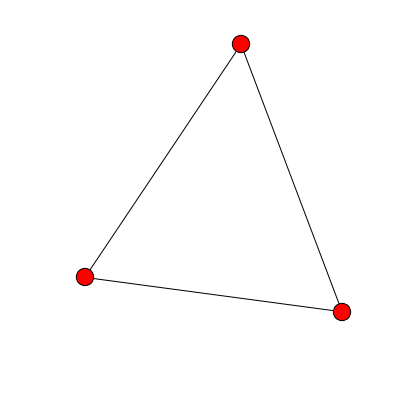

In [4]:
figure(figsize(5, 5))
nx.draw(g)

Let's try with a more complex graph, the Zachary’s Karate club graph[1].

[1] Zachary W. An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473, (1977).

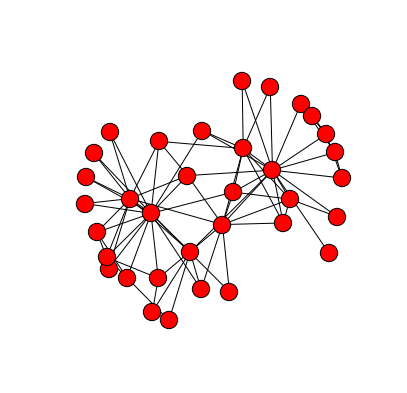

In [5]:
g = nx.karate_club_graph()
nx.draw(g)

The default layout is spring_layout, a simple force-directed layout ( http://en.wikipedia.org/wiki/Force-directed_graph_drawing ).

Other graph layouts are available, like the circular layout.

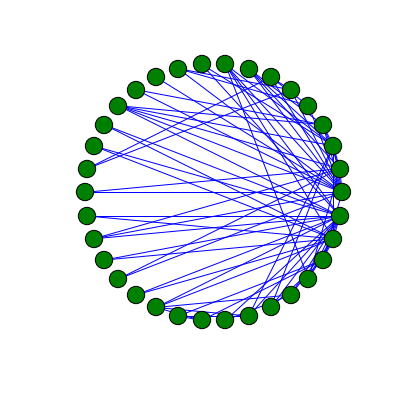

In [6]:
figure(figsize(5, 5))
nx.draw(g, pos=nx.circular_layout(g), node_color='g', edge_color='b')

# Generative models for network analysis

## Erdos-Renyi model

This model takes two parameters: the number of nodes and the probability of having a link between a pair of nodes.

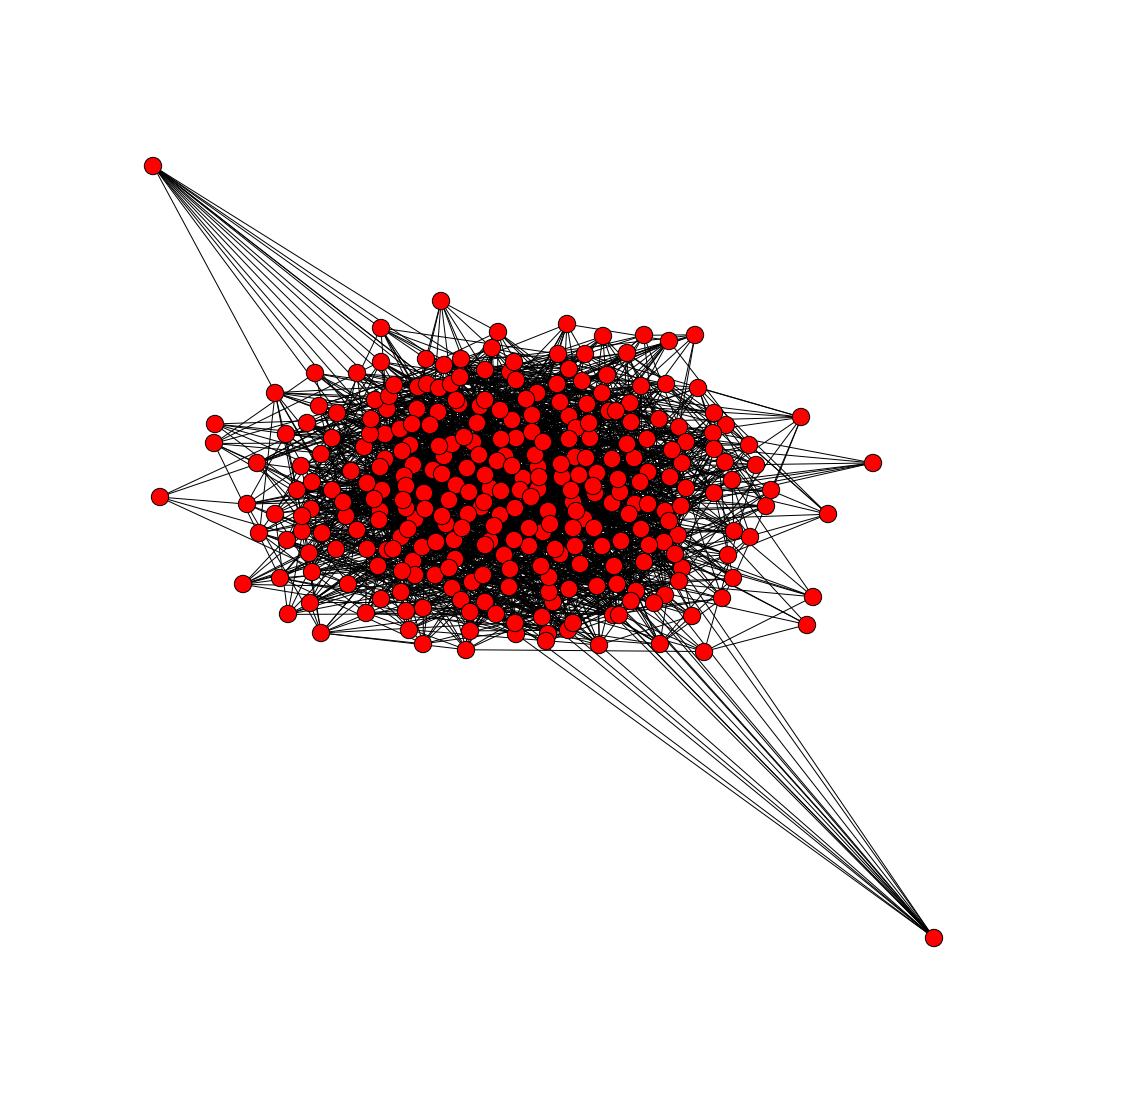

In [7]:
ergraph = nx.erdos_renyi_graph(300, 0.05)

figure(figsize(15, 15))
nx.draw(ergraph, pos=nx.fruchterman_reingold_layout(ergraph))

Degree distribution

In [19]:
nx.degree_histogram(ergraph)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 6,
 16,
 11,
 23,
 30,
 36,
 28,
 30,
 29,
 23,
 13,
 12,
 17,
 11,
 6,
 2,
 2,
 1,
 0,
 2]

In [40]:
ergraph = nx.erdos_renyi_graph(300, 0.05)

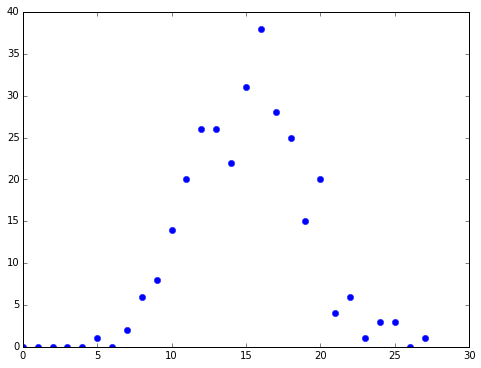

In [41]:
figure(figsize=(8,6))
# uses numpy and matplotlib
plot(nx.degree_histogram(ergraph), 'b.', markersize=12)

Average Clustering Coefficient $c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)}$

In [42]:
np.average(nx.clustering(ergraph).values())

0.055075714852560097

## Watts-Strogatz model

This model takes three parameters. **n** is the number of nodes. 
**k** is the number of nearest neighbors each node is connected in ring topology.
**p** is the probability of rewiring each edge.

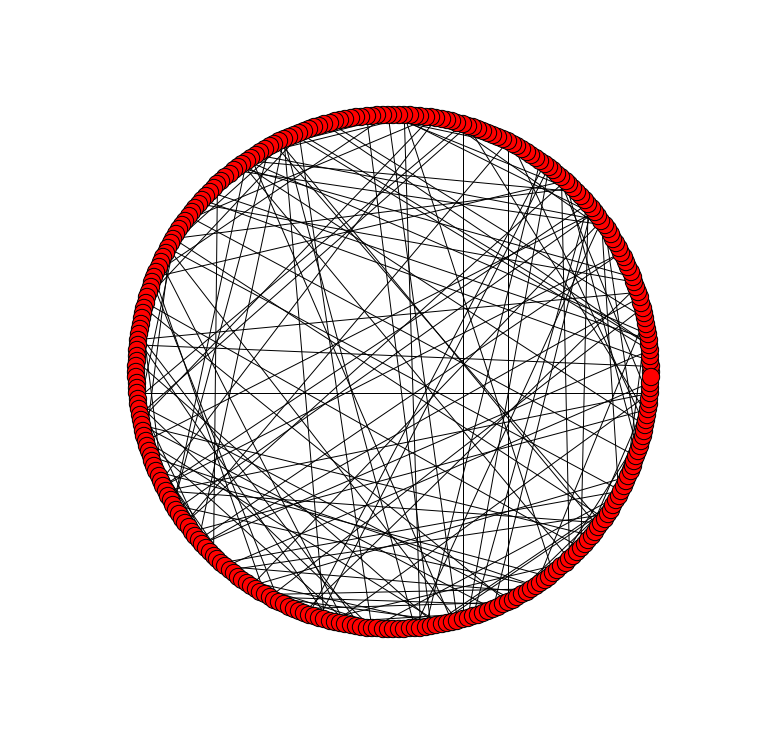

In [44]:
wsgraph = nx.watts_strogatz_graph(300, 10, 0.1)

figure(figsize(10, 10))
nx.draw(wsgraph, pos=nx.circular_layout(wsgraph))

nx.circular_layout returns a list of positions that can be used in the plotting library (matplotlib)

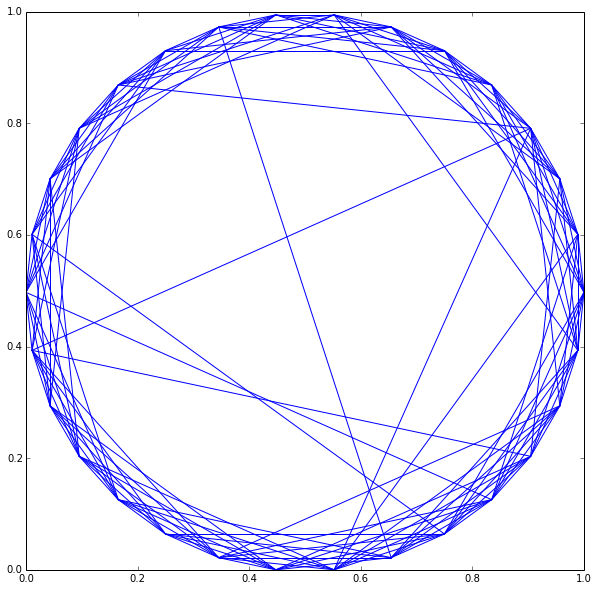

In [12]:
from matplotlib.lines import Line2D
G = nx.watts_strogatz_graph(30, 10, 0.1)
pos = nx.circular_layout(G)
figure(figsize=(10,10))
ax = plt.gca()
for u,v in G.edges():
    x = [pos[u][0],pos[v][0]]
    y = [pos[u][1],pos[v][1]]
    l = Line2D(x,y,linewidth=1,solid_capstyle='round')
    ax.add_line(l)
ax.autoscale()

Degree distribution

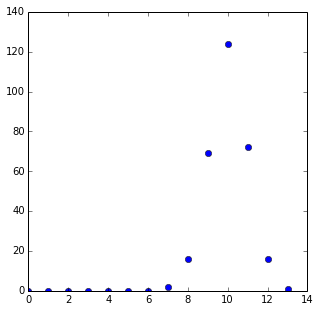

In [13]:
figure(figsize(5, 5))
plot(nx.degree_histogram(wsgraph), 'bo')

Clustering Coefficient

In [14]:
print np.average(nx.clustering(wsgraph).values())

0.491708291708


#### Comparing with a real network: The Airlines network

In [8]:
figure(figsize(10, 10))
airlines = nx.Graph(nx.read_graphml('data/airlines.graphml'))
nx.draw(airlines, pos=nx.fruchterman_reingold_layout(airlines))

IOError: [Errno 2] No such file or directory: 'data/airlines.graphml'

In [ ]:
figure(figsize(5, 5))
plt.loglog()
plot(nx.degree_histogram(airlines), 'bo')

** Degree density distribution: log-log plot wiht log binning **

In [ ]:
x, bins = np.histogram(nx.degree(airlines).values(),
                       bins=np.logspace(0, 8, num=9, base=2.),
                       density=True)
plot(bins[1:], x, 'bo')
plt.loglog()

In [ ]:
print np.average(nx.clustering(airlines).values())

## Barabasi-Albert model

This model takes two parameters, the number of nodes and the number of edges to attach from a new node to existing nodes.

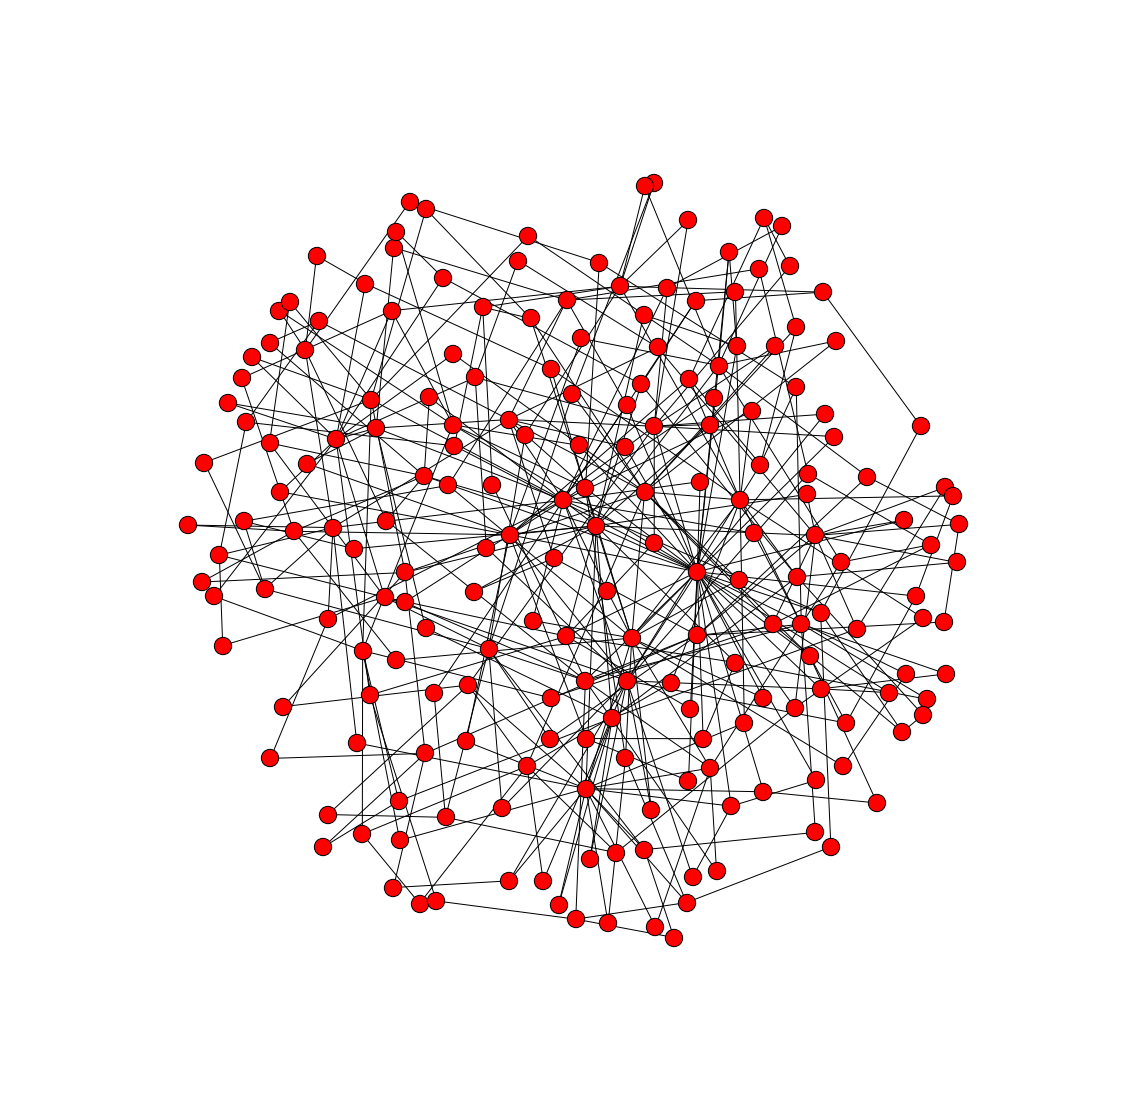

In [9]:
bagraph = nx.barabasi_albert_graph(200, 2)

figure(figsize(15, 15))
nx.draw(bagraph, pos=nx.fruchterman_reingold_layout(bagraph))

In [ ]:
figure(figsize(5, 5))
plot(nx.degree_histogram(bagraph), 'bo')
plt.loglog()

In [ ]:
np.average(nx.clustering(bagraph).values())

# Community detection

school_graph.gexf is a graph in the GEXF file format ( http://gexf.net/).
It represents a weighted network of face-to-face proximity between students and teachers. - See more at: http://www.sociopatterns.org/datasets/primary-school-cumulative-networks/

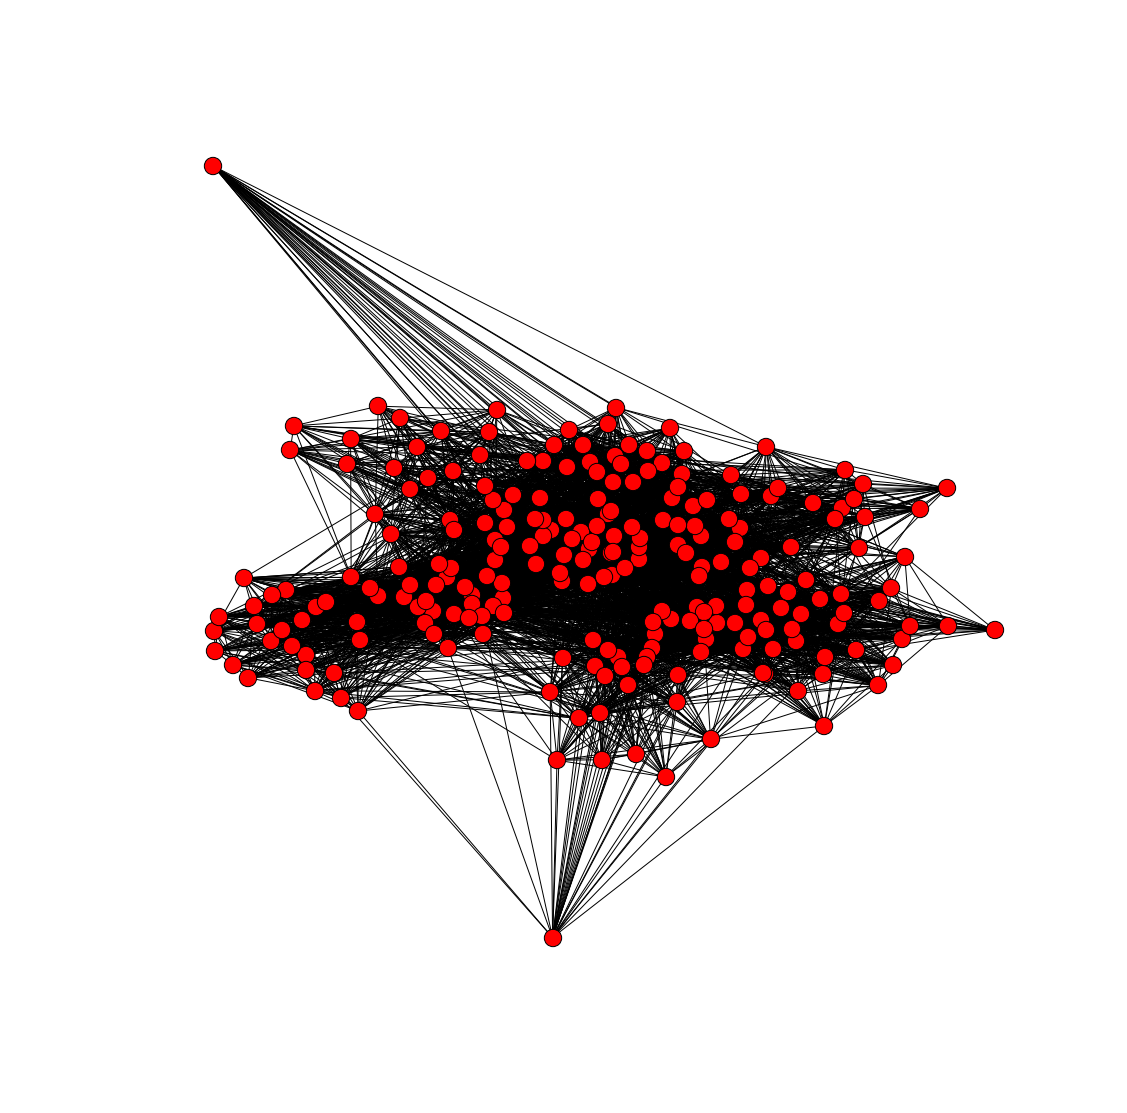

In [15]:
import networkx as nx

school = nx.read_gexf('../data/school_graph.gexf')
figure(figsize(15, 15))
nx.draw(school, pos=nx.fruchterman_reingold_layout(school))

The **community** package is a script written by Thomas Aynaud (http://perso.crans.org/aynaud/) that implements the Louvain algorithm. This algorithm is a greedy optimization method that attempts to optimize the **modularity** of a partition of the network. The optimization is performed in two steps. First, the method looks for "small" communities by optimizing modularity locally. Second, it aggregates nodes belonging to the same community and builds a new network whose nodes are the communities. These steps are repeated iteratively until a maximum of modularity is attained and a hierarchy of communities is produced.

In [16]:
import community

In [17]:
c = community.best_partition(school)

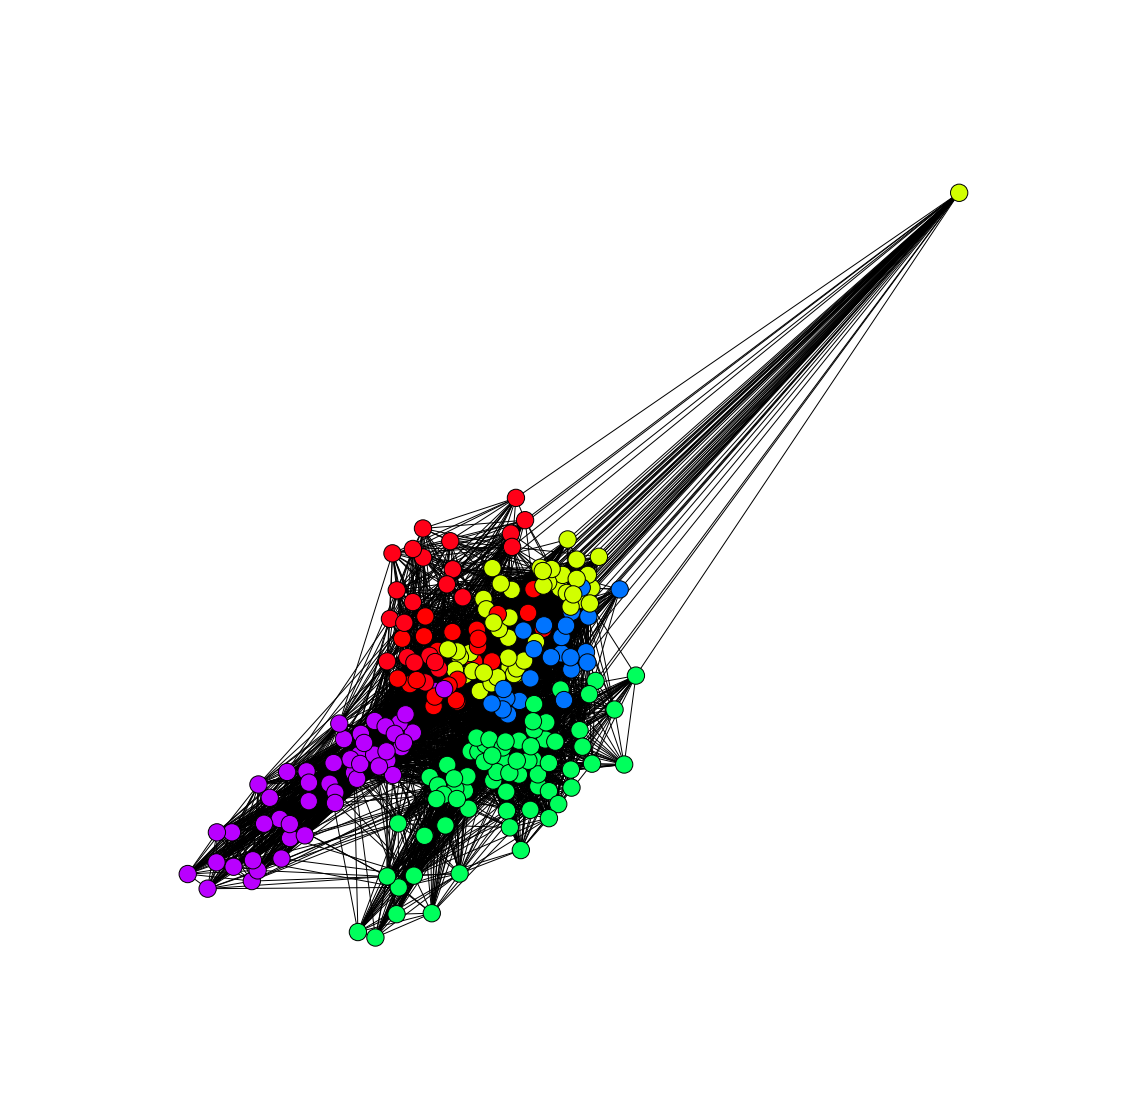

In [18]:
import community
c = community.best_partition(school)
nx.draw(school,
        pos=nx.fruchterman_reingold_layout(school), 
        cmap=plt.cm.hsv,
        node_color=[c[node] for node in school.nodes()])

Other measures available:

- Diameter
- Radius
- Average Shortest Path Length
- Average Clustering Coefficient
- Average Degree
- Degree Distribution
- Degree Centrality
- Closeness Centrality
- Node Betweenness Centrality
- Edge Betweenness Centrality

In [19]:
nx.diameter(school)

3

In [20]:
nx.radius(school)

2

In [21]:
np.max(nx.eccentricity(school).values())

3

In [22]:
nx.average_shortest_path_length(school)

1.860439956725568

In [ ]:
nx.average_clustering(school)

In [ ]:
np.average(nx.degree(school).values())

In [ ]:
np.average(nx.degree_centrality(school).values())

In [ ]:
np.average(nx.closeness_centrality(school).values())

In [ ]:
np.average(nx.betweenness_centrality(school).values())

In [ ]:
np.average(nx.edge_betweenness_centrality(school).values())

# Network Analysis with the igraph library

http://igraph.sourceforge.net/

### Installing igraph in Ubuntu Linux:

Add the Launchpad repository of igraph to apt:

    sudo add-apt-repository ppa:igraph/ppa

Then update your package database and install the python-igraph package:

    sudo apt-get update
    sudo apt-get install python-igraph

You can use the igraph module of Python now.

First step: loading and showing a graph:

In [12]:
reload(igraph)

<module 'igraph' from '/home/daohai/anaconda/lib/python2.7/site-packages/igraph/__init__.pyc'>

In [13]:
import igraph

g = igraph.read('../data/school.graphml', format='graphml')

layout = g.layout("fruchterman_reingold")
igraph.plot(g, target='igraph.png', layout=layout)

from IPython.display import Image
Image(filename='igraph.png')

NotImplementedError: Error at foreign-graphml.c:1211: GraphML support is disabled, Unimplemented function call

There are some community detection methods available in the igraph library.

You can find a summary of these methods in this link:
http://bommaritollc.com/2012/06/17/summary-community-detection-algorithms-igraph-0-6/

Some of them, like the InfoMAP method, returns a clustering object:

    c = g.community_infomap()
    print c

This will return a clustering with "n" elements and "k" clusters.

Others, like the Walktrap method, returns a tree or a dendogram, and you have to call the *.as_clustering(k)* method where k is the number of clusters you want to extract:

    t = g.community_walktrap()
    c = t.as_clustering(10)
    print c

Attention if you want to try Optimal Modularity, it takes a lot of memory!

In [14]:
t = g.community_walktrap()
t.as_clustering(10)

NameError: name 'g' is not defined

In [ ]:
t = g.community_walktrap()
c = t.as_clustering(10)
g.vs['color'] = [plt.cm.hsv(1.*i/len(c)) for i in c.membership]
g.vs['size'] = 10

layout = g.layout("fruchterman_reingold")
igraph.plot(g, target='igraph.png', layout=layout)

from IPython.display import Image
Image(filename='igraph.png')

# NetworkX and Numpy

In [ ]:
n = 100
adj_matrix = np.zeros((n, n))
adj_matrix

In [ ]:
p = 0.1
for i in range(n):
    for j in range(i+1, n):
        if np.random.rand() < p:
            adj_matrix[i,j] = 1.
adj_matrix

In [ ]:
figure(figsize=(10,10))
pcolormesh(adj_matrix, cmap=cm.binary)

In [ ]:
figure(figsize=(10,10))
pcolormesh(adj_matrix+adj_matrix.T, cmap=cm.binary)

In [ ]:
G = nx.from_numpy_matrix(adj_matrix)

In [ ]:
figure(figsize=(10,10))
nx.draw(G)

In [ ]:
from igraph import Graph
g = Graph.Adjacency(adj_matrix.tolist())
layout = g.layout("fruchterman_reingold")
igraph.plot(g, target='igraph.png', layout=layout)

from IPython.display import Image
Image(filename='igraph.png')

### Sparse matrices

In [ ]:
G = nx.barabasi_albert_graph(10000, 2)

In [ ]:
sparse_adj = nx.to_scipy_sparse_matrix(G)
sparse_adj

In [ ]:
sparse_adj.nonzero()